## > Gerando data sensível falsa.

In [1]:
from gen_fake_csv_data import SensitiveDataGenerator

sensitive_data_gen = SensitiveDataGenerator('pt_BR')
#sensitive_data_gen.write_csv_cpf_random(name="cpf_list_mix_treino.csv", title=['Coluna A', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_cpf_random(name="cpf_list_mix_teste.csv", title=['Coluna A', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_cpf_random(name="dataset_cpf_list_mix.csv", title=['Coluna A', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_treino.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_teste.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_sensitive_only(name="apenas_dados_sensiveis_teste.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)

### Imports de bibliotecas importantes

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
#import functools

import tensorflow as tf
import pandas as pd
import numpy as np

from plot_history_helper import plot_history_accuracy, plot_history_loss
from tensorflow import keras
from keras.backend import clear_session
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
# clear_session() -> limpa o estado da antiga sessão.

## > Lendo CSV e criando dados de teste e treino com 3 colunas para o modelo.

### Lendo dados de treinamento

In [3]:
clear_session()
# SESSÃO DE TREINAMENTO.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
X_train = pd.read_csv("./dados_sensiveis_mix_treino.csv")
X_train.fillna(X_train.mean(), inplace=True)

columns = list(X_train)
print(X_train)

# # Categorizando.
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = pd.Categorical(pd.factorize(X_train[i])[0])

print(X_train)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = le.fit_transform(X_train[i])

print(X_train)

y_train = X_train["Classe"]
X_train.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X_train = X_train.values
y_train = y_train.values
# FIM SESSÃO DE TREINAMENTO.

                       Coluna A          Coluna B                Coluna C  \
0            Caroline Rodrigues     Android 4.1.2  Cientista de alimentos   
1             Davi Luiz da Cruz   340900984445791            61 5813-9187   
2                 Otávio Moraes  4499121817705274     +55 (011) 4377-8486   
3             Dra. Sarah Novaes     4628965763638            81 1192 0671   
4                Eduarda da Paz  3515645407486970     +55 (061) 0156 9998   
..                          ...               ...                     ...   
994               Murilo Moraes  3593316473596796        +55 81 5744-3853   
995  Srta. Vitória da Conceição     Android 2.3.1           Acupunturista   
996             Kamilly Pereira     4650236442354     +55 (031) 1874 9871   
997              Isabel Correia   213134431563097     +55 (084) 1824 0876   
998            Leonardo Ribeiro     4935240491798        +55 21 9418-7378   

     Classe  
0         0  
1         1  
2         1  
3         1  
4    

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_3144\1593972125.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.fillna(X_train.mean(), inplace=True)


### Lendo dados de teste.

In [4]:
# SESSÃO DE TESTE.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
X_test = pd.read_csv("./dados_sensiveis_mix_teste.csv")
X_test.fillna(X_test.mean(), inplace=True)

columns = list(X_test)
print(X_test)

# Categorizando.
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = pd.Categorical(pd.factorize(X_test[i])[0])

#print(X_test)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = le.fit_transform(X_test[i])

print(X_test)

y_test = X_test["Classe"]
X_test.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X_test = X_test.values
y_test = y_test.values
# FIM SESSÃO DE TESTE.

                Coluna A          Coluna B             Coluna C  Classe
0             Caio Sales  4338960286895990         61 0186 3082       1
1    Sra. Clara Silveira  3575708029479091  +55 (081) 8085-4262       1
2            Diogo Cunha  2250213920610567         21 5979-7957       1
3         Pietro Pereira  5473615923423406      (084) 7681-8755       1
4            Maria Gomes     Android 5.0.1            Chargista       0
..                   ...               ...                  ...     ...
994      Bernardo Castro       Android 3.1      Perito criminal       0
995       Helena Almeida  2295591628111286         41 4577-5196       1
996  Enzo Gabriel Aragão  6500627849181641      (051) 7840 6156       1
997   Gabrielly da Cunha   180022558844045  +55 (051) 6128-1259       1
998        Stella Araújo  4907142878366588     +55 71 4365 5104       1

[999 rows x 4 columns]
    Coluna A Coluna B Coluna C  Classe
0          0        0        0       1
1          1        1        1    

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_3144\2461429639.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean(), inplace=True)


### Criação de modelo utilizando ativador sigmoid(x) = 1 / (1 + exp(-x))

In [32]:
from keras import layers

clear_session()

print(X_train.shape[1])
input_dim = X_train.shape[1]

# modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
model = keras.Sequential()
model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='sigmoid'))
model.add(keras.layers.Dense(8, activation='sigmoid'))
model.add(keras.layers.Dense(8, activation='sigmoid'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# Configurando o modelo de treinamento.
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=[
    keras.metrics.TruePositives(name='true_positives'),
    keras.metrics.FalsePositives(name='false_positives'),
    keras.metrics.TrueNegatives(name='true_negatives'),
    keras.metrics.FalseNegatives(name='false_negatives'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    ]
  )
model.summary() # Mostra os paramestros disponíveis para treinar

3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 377
Trainable params: 377
Non-trainable 

### Treinamento e teste do modelo.

In [33]:
import matplotlib.pyplot as plot
from plot_history_helper import plot_history
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 10, restore_best_weights = True)

#Treinando o modelo.
#history = model.fit(
#  X_train,
#  y_train,
#  epochs=100,
#  verbose=2,
#)

#Mostrando resultados do treinamento com dataset de train.
#pd.DataFrame(history.history).plot(figsize=(8,5))
#plot.show()

# Treinando o modelo.
history = model.fit(
  X_train,
  y_train,
  epochs=225,
  verbose=True,
  validation_data=(X_test, y_test),
  batch_size=25,
  callbacks =[earlystopping]
)

Epoch 1/225
40/40 [==============================] - 3s 25ms/step - loss: 0.7198 - true_positives: 495.0000 - false_positives: 504.0000 - true_negatives: 0.0000e+00 - false_negatives: 0.0000e+00 - accuracy: 0.4955 - precision: 0.4955 - val_loss: 0.6963 - val_true_positives: 523.0000 - val_false_positives: 476.0000 - val_true_negatives: 0.0000e+00 - val_false_negatives: 0.0000e+00 - val_accuracy: 0.5235 - val_precision: 0.5235
Epoch 2/225
40/40 [==============================] - 0s 7ms/step - loss: 0.6993 - true_positives: 495.0000 - false_positives: 504.0000 - true_negatives: 0.0000e+00 - false_negatives: 0.0000e+00 - accuracy: 0.4955 - precision: 0.4955 - val_loss: 0.6876 - val_true_positives: 523.0000 - val_false_positives: 476.0000 - val_true_negatives: 0.0000e+00 - val_false_negatives: 0.0000e+00 - val_accuracy: 0.5235 - val_precision: 0.5235
Epoch 3/225
40/40 [==============================] - 0s 6ms/step - loss: 0.6893 - true_positives: 495.0000 - false_positives: 504.0000 - true

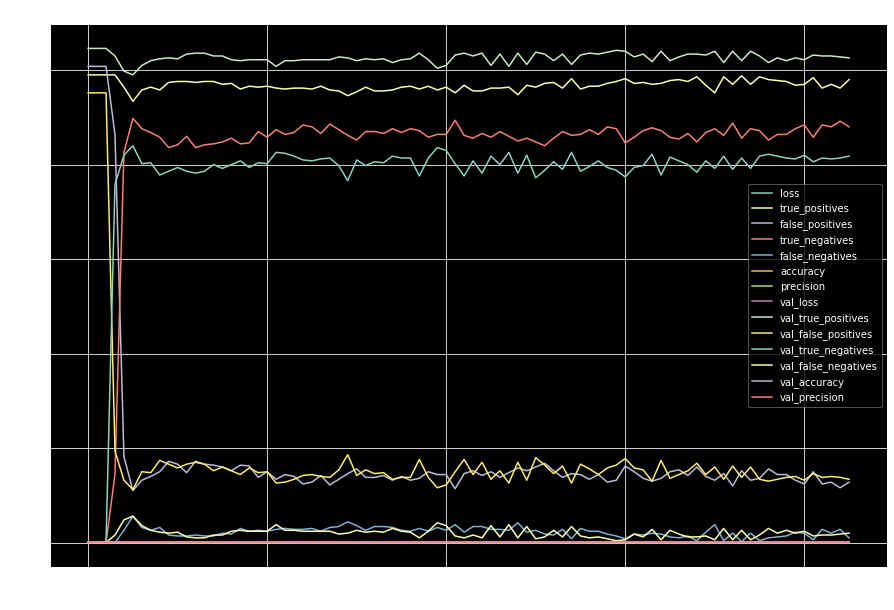

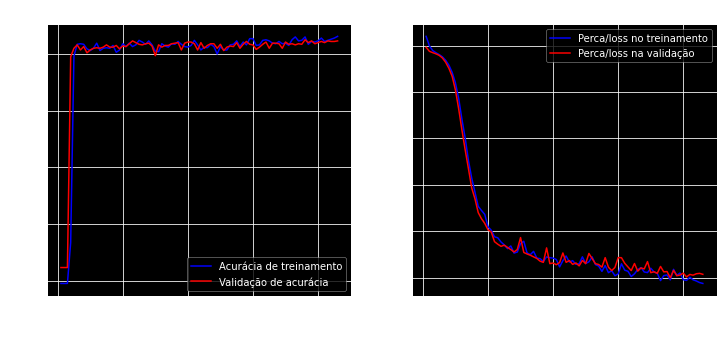

In [34]:
# Mostrando resultados do treinamento com dataset de train.
df = pd.DataFrame(history.history).plot(figsize=(15,10))
plot.xlabel('Épocas')
plot.ylabel('Tamanho Amostra')
plot.title('Modelo no Treinamento')
plot.show()

plot_history(history)
print()

### Realizando a Avaliação do modelo utilizando os dados de teste.

In [35]:

loss, tp, fp, tn, fn, accuracy, precision = model.evaluate(X_test, y_test, verbose=1, batch_size=32)
#loss, accuracy = model.evaluate(X_test, y_test, verbose=1, batch_size=32)
print(f"Acurácia no teste: {accuracy}")
print(f"Perca no teste: {loss}")

32/32 [==============================] - 0s 2ms/step - loss: 0.1995 - true_positives: 515.0000 - false_positives: 67.0000 - true_negatives: 409.0000 - false_negatives: 8.0000 - accuracy: 0.9249 - precision: 0.8849
Acurácia no teste: 0.924924910068512
Perca no teste: 0.19947028160095215


### Realizando previsão no dataset de teste.

In [36]:
model.summary()
print("> Realizando a previsão.")
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x, axis=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 377
Trainable params: 377
Non-trainable pa

In [37]:
dataset = pd.read_csv("./dataset_dados_sensiveis_mix.csv")
dataset.fillna(dataset.mean(), inplace=True)

columns = list(dataset)
print(dataset)

# Categorizando.
#for i in columns:
#    if dataset[i].dtypes == 'object':
#        dataset[i] = pd.Categorical(pd.factorize(dataset[i])[0])

#print(dataset)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if dataset[i].dtypes == 'object':
        dataset[i] = le.fit_transform(dataset[i])

classes = dataset["Classe"]
dataset.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
dataset = dataset.values
classes = classes.values

                       Coluna A          Coluna B                Coluna C  \
0            Caroline Rodrigues     Android 4.1.2  Cientista de alimentos   
1             Davi Luiz da Cruz   340900984445791            61 5813-9187   
2                 Otávio Moraes  4499121817705274     +55 (011) 4377-8486   
3             Dra. Sarah Novaes     4628965763638            81 1192 0671   
4                Eduarda da Paz  3515645407486970     +55 (061) 0156 9998   
..                          ...               ...                     ...   
994               Murilo Moraes  3593316473596796        +55 81 5744-3853   
995  Srta. Vitória da Conceição     Android 2.3.1           Acupunturista   
996             Kamilly Pereira     4650236442354     +55 (031) 1874 9871   
997              Isabel Correia   213134431563097     +55 (084) 1824 0876   
998            Leonardo Ribeiro     4935240491798        +55 21 9418-7378   

     Classe  
0         0  
1         1  
2         1  
3         1  
4    

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_3144\2992950136.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


In [38]:
# Mostrando as previsões
for i in range(len(X_test)):
	print(f"X={dataset[i]} Previsão={predict_x[i]}, y_test={y_test[i]}")

X=[146 532 557] Previsão=[0.21180138], y_test=1
X=[199 118 454] Previsão=[0.54250234], y_test=1
X=[733 332 126] Previsão=[0.66838497], y_test=1
X=[290 361 475] Previsão=[0.6953219], y_test=1
X=[295 151 197] Previsão=[0.69879353], y_test=0
X=[150  37 143] Previsão=[0.6903563], y_test=1
X=[770 477  50] Previsão=[0.6727229], y_test=0
X=[898 293 416] Previsão=[0.64782494], y_test=0
X=[573 508 818] Previsão=[0.6177008], y_test=1
X=[818 538 712] Previsão=[0.5847168], y_test=0
X=[848 347  88] Previsão=[0.5513692], y_test=1
X=[591  78 493] Previsão=[0.51989824], y_test=0
X=[807 503 771] Previsão=[0.49195734], y_test=1
X=[909 539 766] Previsão=[0.46849364], y_test=0
X=[839  32 223] Previsão=[0.44982377], y_test=1
X=[414 265 102] Previsão=[0.435816], y_test=1
X=[834  52 432] Previsão=[0.4260823], y_test=1
X=[444 506 602] Previsão=[0.42011657], y_test=0
X=[ 87 518 786] Previsão=[0.41739056], y_test=0
X=[456 547 803] Previsão=[0.41740248], y_test=0
X=[180 516 650] Previsão=[0.4196978], y_test=0
X=

### Realizando uma previsão com um dataset com dados sensíveis misturados com dados não sensíveis.

In [ ]:
dataset = pd.read_csv("./dataset_dados_sensiveis_mix.csv")
dataset.fillna(dataset.mean(), inplace=True)

columns = list(dataset)
print(dataset)

# Categorizando.
for i in columns:
    if dataset[i].dtypes == 'object':
        dataset[i] = pd.Categorical(pd.factorize(dataset[i])[0])

print(dataset)

# Fazendo o pré processamento.
#le = preprocessing.LabelEncoder()
#for i in columns:
#    if dataset[i].dtypes == 'object':
#        dataset[i] = le.fit_transform(dataset[i])

classes = dataset["Classe"]
dataset.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
dataset = dataset.values
classes = classes.values

                       Coluna A          Coluna B                Coluna C  \
0            Caroline Rodrigues     Android 4.1.2  Cientista de alimentos   
1             Davi Luiz da Cruz   340900984445791            61 5813-9187   
2                 Otávio Moraes  4499121817705274     +55 (011) 4377-8486   
3             Dra. Sarah Novaes     4628965763638            81 1192 0671   
4                Eduarda da Paz  3515645407486970     +55 (061) 0156 9998   
..                          ...               ...                     ...   
994               Murilo Moraes  3593316473596796        +55 81 5744-3853   
995  Srta. Vitória da Conceição     Android 2.3.1           Acupunturista   
996             Kamilly Pereira     4650236442354     +55 (031) 1874 9871   
997              Isabel Correia   213134431563097     +55 (084) 1824 0876   
998            Leonardo Ribeiro     4935240491798        +55 21 9418-7378   

     Classe  
0         0  
1         1  
2         1  
3         1  
4    

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_4704\3886828975.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


### Previsão

In [ ]:
model.summary()
print("> Realizando a previsão.")
predict_x=model.predict(dataset) 
classes_x=np.argmax(predict_x, axis=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 349
Trainable params: 349
Non-trainable params: 0
_________________________________________________________________
> Realizando a previsão.
32/32 [==========================

In [ ]:
# Mostrando as previsões
for i in range(len(dataset)):
	print(f"X={dataset[i]} Previsão={predict_x[i]}, classe={classes[i]}")

X=[0 0 0] Previsão=[0.18417445], classe=0
X=[1 1 1] Previsão=[0.19413832], classe=1
X=[2 2 2] Previsão=[0.21081726], classe=1
X=[3 3 3] Previsão=[0.22460991], classe=1
X=[4 4 4] Previsão=[0.23295312], classe=1
X=[5 5 5] Previsão=[0.23831074], classe=1
X=[6 6 6] Previsão=[0.24260865], classe=1
X=[7 7 7] Previsão=[0.24695899], classe=1
X=[8 8 8] Previsão=[0.25136146], classe=0
X=[9 9 9] Previsão=[0.2552126], classe=0
X=[10 10 10] Previsão=[0.25897267], classe=1
X=[11 11 11] Previsão=[0.26276866], classe=1
X=[12 12 12] Previsão=[0.26660022], classe=0
X=[13 13 13] Previsão=[0.2704672], classe=0
X=[14 14 14] Previsão=[0.27436924], classe=1
X=[15 15 15] Previsão=[0.27830616], classe=1
X=[16 16 16] Previsão=[0.2822775], classe=1
X=[17 17 17] Previsão=[0.28628308], classe=0
X=[18 18 18] Previsão=[0.29032254], classe=0
X=[19 19 19] Previsão=[0.29439542], classe=0
X=[20 20 20] Previsão=[0.29850143], classe=0
X=[21 21 21] Previsão=[0.30264017], classe=0
X=[22 22 22] Previsão=[0.3068112], classe=0

### Análisando apenas as previsões feita pelo modelo.

### Detecção de outliers usando Desvio Padrão.

Como um padrão para quase todo dataset, pelo menos 90.7% dele esta entre três tipos de desvio padrão, com os outliers perto de 0.3% do tamanho do dataset.

Média dos valores: 
predict    0.570263
dtype: float32

Desvio de padrão dos valores: 
predict    0.366599
dtype: float32


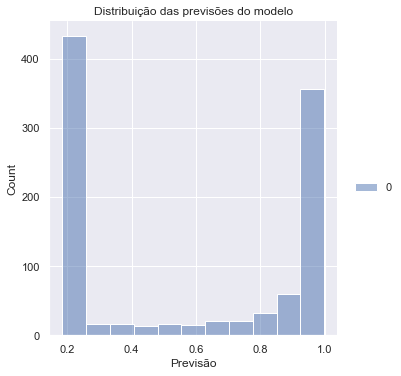

In [ ]:

import seaborn as sns

df_predicted = pd.DataFrame(predict_x, columns=['predict'])

sns.set_theme()
sns.displot(data=predict_x).set(title="Distribuição das previsões do modelo", xlabel="Previsão")

print(f'Média dos valores: \n{df_predicted.mean()}')
print()
print(f'Desvio de padrão dos valores: \n{df_predicted.std()}')

### Utilizando o limite inferior: média(μ - 3 * σ) e o limite superior: média(μ + 3 * σ) para encontrar os outliers no database.

In [ ]:
lower_limit = df_predicted.mean() - 3 * df_predicted.std()
upper_limit = df_predicted.mean() + 3 * df_predicted.std()

In [ ]:
lower_limit

predict   -0.529535
dtype: float32

In [ ]:
upper_limit

predict    1.670061
dtype: float32

In [ ]:
df_scores_filtered=df_predicted[(df_predicted['predict'] > lower_limit['predict']) & (df_predicted['predict'] < upper_limit['predict'])]
df_scores_filtered

,predict
0,0.184174
1,0.194138
2,0.210817
3,0.224610
4,0.232953
...,...
994,0.986918
995,0.184174
996,0.986794
997,0.987254


### Utilizando Z-Score

In [ ]:
df_predicted['z_score']=(df_predicted['predict'] - df_predicted['predict'].mean())/df_predicted['predict'].std()
df_predicted.head()

,predict,z_score
0,0.184174,-1.053162
1,0.194138,-1.025982
2,0.210817,-0.980486
3,0.224610,-0.942863
4,0.232953,-0.920104


In [ ]:
df_scores_filtered= df_predicted[(df_predicted['z_score']>-3) & (df_predicted['z_score']<3)]
print(df_scores_filtered)

      predict   z_score
0    0.184174 -1.053162
1    0.194138 -1.025982
2    0.210817 -0.980486
3    0.224610 -0.942863
4    0.232953 -0.920104
..        ...       ...
994  0.986918  1.136542
995  0.184174 -1.053162
996  0.986794  1.136203
997  0.987254  1.137458
998  0.987698  1.138670

[999 rows x 2 columns]


### Utilizando IRQ para avaliar os predict

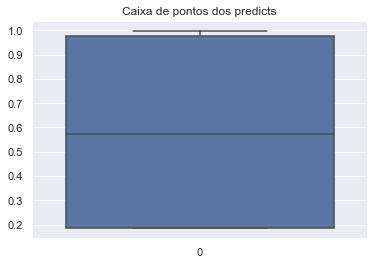

In [ ]:
sns.boxplot(data=predict_x).set(title="Caixa de pontos dos predicts")
df_predicted = pd.DataFrame(predict_x, columns=['predict'])

In [ ]:
df_predicted.describe()

,predict
count,999.000000
mean,0.570263
std,0.366599
min,0.184174
25%,0.184174
50%,0.571608
75%,0.977405
max,0.998011


In [ ]:
IQR = (9.655807e-01)-(8.240152e-14)
print(f'IRQ: {IQR}')
lower_limit = (8.240152e-14) - (1.5*IQR)
upper_limit = (9.655807e-01) + (1.5*IQR)
print(upper_limit)
print(lower_limit)

IRQ: 0.9655806999999176
2.4139517499998764
-1.448371049999794


In [ ]:
df_scores_filtered = df_predicted[(df_predicted['predict']>lower_limit) & (df_predicted['predict']<upper_limit)]
print(df_scores_filtered)

      predict
0    0.184174
1    0.194138
2    0.210817
3    0.224610
4    0.232953
..        ...
994  0.986918
995  0.184174
996  0.986794
997  0.987254
998  0.987698

[999 rows x 1 columns]


### Encriptando o dataset.

In [ ]:
import hashlib

def sha_512_hash(data):
  return hashlib.sha512(data.encode('utf-8')).hexdigest()

In [2]:
#import csv

#from encryption_box import rsa_encrypt
#from rsa_alg import RSA

#X_test = pd.read_csv("./dados_sensiveis_mix_teste.csv")
#X_test.fillna(X_test.mean(), inplace=True)

#classes = X_test["Classe"]

#rsa_encrypt(predict_x, X_test, classes)

In [ ]:
import csv
from rsa_alg import RSA

X_test = pd.read_csv("./dados_sensiveis_mix_teste.csv")
X_test.fillna(X_test.mean(), inplace=True)

classes = X_test["Classe"]

with open('dataset_encriptado_sigmoid.csv', 'w',  newline='', encoding='utf-8') as csv_file:
  writer:object = csv.writer(csv_file)
  writer.writerow(['Coluna A', 'Coluna B', 'Coluna C'])
  rsa_alg = RSA(17, 41)
  rsa_alg.calc_n()
  rsa_alg.calc_euler_totient()
  rsa_alg.calc_public_key(15)
  for index in range(1, 1000-1):
    if(round(predict_x[index][0]) == classes[index]):
      # Encriptando os dados.
      r1 = rsa_alg.encrypt_message(X_test['Coluna A'][index])
      r2 = rsa_alg.encrypt_message(X_test['Coluna B'][index])
      r3 = rsa_alg.encrypt_message(X_test['Coluna C'][index])
      # Encriptando
      encrypted_a: str = ''.join(str(x) for x in r1)
      encrypted_b: str = ''.join(str(y) for y in r2)
      encrypted_c: str = ''.join(str(z) for z in r3)
      # Escrevendo no arquivo.
      writer.writerow([
        encrypted_a,
        encrypted_b,
        encrypted_c
        ])
    else:
      writer.writerow([X_test['Coluna A'][index], X_test['Coluna B'][index], X_test['Coluna C'][index]])

Maria Gomes
Android 5.0.1
Chargista
Dra. Ana Clara Nascimento
Android 7.1
Assessor de imprensa
Bryan Dias
Android 4.0.3
Juiz de direito
Dr. João Gabriel da Mata
Android 4.2.2
Profissional de relacionamento com investidores RI
Nicolas Caldeira
Android 1.5
Redator
Sr. Pedro Miguel Mendes
Android 1.1
Aviador
Renan Porto
Android 7.1.1
Lixeiro/Coletor de lixo
Emilly Melo
Android 6.0
Cientista da informação e documentação
Maysa Freitas
Android 4.4
Coloproctologista
Sra. Lorena Jesus
Android 9
Engenheiro de som
Matheus Teixeira
Android 2.3.2
Militar da Marinha
Davi Lucas Almeida
Android 1.1
Gestor ambiental
Maysa Cardoso
Android 4.4.4
Dublê
Emanuel Peixoto
Android 1.0
Sacoleira
Dr. Enrico Pires
Android 7.0
Contábil
Olivia Castro
Android 2.2.1
Subprefeito
Srta. Laura Teixeira
Android 5.0
Torneiro mecânico
Antônio Duarte
Android 4.0
Cerimonialista
Renan Nunes
Android 2.2
Guarda ou policial rodoviário
Lavínia Nunes
Android 7.1.1
Matemático
Srta. Sophia das Neves
Android 10
Ajudante de produção
I

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_4704\14442961.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean(), inplace=True)


## Salvando o modelo na pasta models

In [1]:
filepath = "./model/sigmoid_model"
model.save(filepath)
keras.models.load_model(filepath)

NameError: name 'model' is not defined

## Carregando o modelo da pasta models

In [ ]:
model = tf.keras.models.load_model("./model/sigmoid_model")